An Eigenfaces Session with python
==========
Bernat Chiva
---
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

## Diputado Class

A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [10]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender

Populating the interactive namespace from numpy and matplotlib


Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [11]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()

In [12]:
import csv
with open('C:/Users/berna/OneDrive/Desktop/UPC/S2/2. BBDD/Final Assignemnt - Faces/db/index.csv','r', encoding='utf-8' ) as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"C:/Users/berna/OneDrive/Desktop/UPC/S2/2. BBDD/Final Assignemnt - Faces/db/db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)

In [13]:
p.len()
p[99].getPicfile()

'C:/Users/berna/OneDrive/Desktop/UPC/S2/2. BBDD/Final Assignemnt - Faces/db/db/91c.jpg'

Let's create a dataset of the analysis.


'Joan|Tardà i Coma|H'

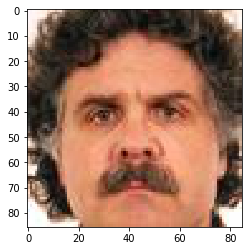

In [14]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 129
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

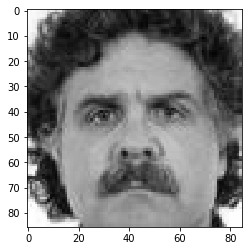

In [8]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)

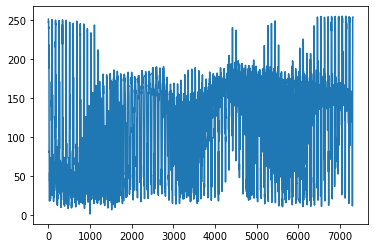

In [9]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables.

In [10]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p]) # array with gender
Yp=np.array([ d.getParty() for d in p]) # array with party affiliation
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

Populating the interactive namespace from numpy and matplotlib


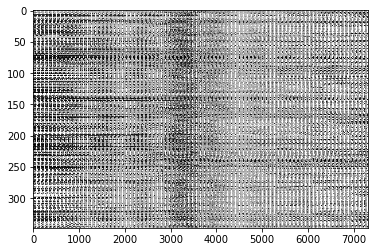

In [11]:
%pylab inline
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')

## 1. Compute the mean representative and plot the image corresponding to the mean representative

In [12]:
mean_columns = np.mean(X, axis = 0) # mean of each pixel (7310 pixels)
mean_columns.shape

(7310,)

In [13]:
I.shape

(86, 85)

In [14]:
image_avg = mean_columns.reshape(86,85) # convert back to image

Populating the interactive namespace from numpy and matplotlib


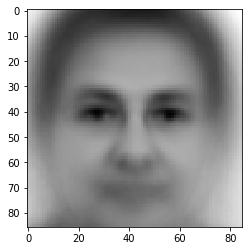

In [15]:
%pylab inline
img=pl.imshow(image_avg)
img.set_cmap('gray')
Is=shape(image_avg)

The image above, is the "mean face" of the representatives. We can see clearly the eyes mouth and contour of the face.

## 2. Compute the standard deviation and plot the corresponding image

In [16]:
stddev_columns = X.std(axis = 0) # standard deviation of the columns
stddev_columns.shape

(7310,)

Populating the interactive namespace from numpy and matplotlib


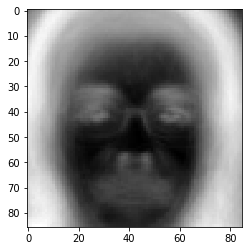

In [17]:
image_std = stddev_columns.reshape(86,85)
%pylab inline
img=pl.imshow(image_std)
img.set_cmap('gray')
Is=shape(image_std)

The 'standard deviation face' of the representatives seems to be the inverse of the 'mean face'. We can see an intuition of some glasses, the nose, mouth and the contour of the face.

In [18]:
# Test class
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
k_means.labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
k_means.cluster_centers_.shape # The centroid of the clusters

(2, 7310)

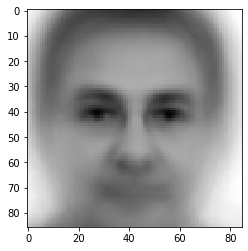

In [21]:
pl.figure()
pl.imshow( k_means.cluster_centers_[0,:].reshape(Is))

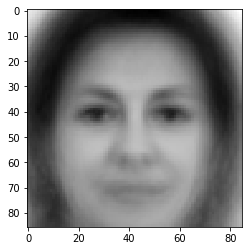

In [22]:
pl.figure()
pl.imshow( k_means.cluster_centers_[1,:].reshape(Is))

Fitting two clusters thorugh the k-means algorithm and plotting these two centorids, we can see how both images represent different genres. The first centroid, similar to the 'mean face' represents a 'mean of man' and the second a 'mean of woman'.

## 3. Run a k-means clustering and split the representatives' data into 10 groups. Plot the full set of images for two groups of your choice.

In [25]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 10) # 10 clusters
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
#We check the cluster assigment for each observation
labels=k_means.labels_
labels

array([7, 1, 2, 4, 0, 2, 8, 5, 5, 9, 3, 2, 5, 4, 4, 3, 9, 4, 1, 1, 2, 4,
       0, 0, 3, 4, 4, 9, 5, 0, 8, 4, 9, 6, 7, 5, 0, 4, 0, 5, 0, 4, 2, 2,
       8, 9, 4, 9, 9, 4, 1, 3, 4, 5, 4, 9, 3, 0, 7, 4, 6, 1, 4, 5, 4, 8,
       8, 7, 0, 5, 8, 0, 6, 1, 6, 1, 3, 8, 1, 0, 3, 8, 7, 1, 4, 5, 4, 9,
       4, 8, 8, 4, 4, 8, 9, 3, 1, 6, 2, 7, 1, 6, 2, 7, 7, 8, 2, 4, 4, 8,
       7, 1, 2, 8, 6, 0, 2, 2, 6, 4, 4, 9, 2, 6, 7, 3, 0, 2, 5, 8, 4, 8,
       0, 2, 2, 4, 7, 8, 5, 8, 7, 1, 8, 0, 7, 2, 9, 3, 7, 2, 5, 4, 5, 2,
       5, 3, 8, 1, 4, 4, 6, 7, 0, 4, 6, 3, 1, 4, 4, 3, 8, 5, 9, 4, 4, 9,
       9, 2, 9, 2, 6, 8, 7, 4, 3, 7, 3, 6, 0, 9, 3, 1, 9, 1, 1, 2, 9, 9,
       5, 1, 6, 5, 1, 7, 3, 7, 1, 7, 7, 7, 3, 4, 8, 1, 7, 7, 7, 6, 1, 0,
       2, 6, 8, 4, 4, 4, 8, 3, 6, 3, 5, 7, 5, 7, 4, 3, 2, 7, 8, 4, 1, 1,
       9, 4, 2, 1, 3, 7, 4, 1, 0, 6, 5, 7, 5, 1, 3, 0, 4, 2, 7, 3, 7, 1,
       4, 3, 2, 7, 2, 1, 9, 8, 1, 7, 4, 1, 7, 4, 9, 2, 2, 3, 8, 9, 4, 6,
       3, 2, 6, 2, 8, 2, 7, 2, 2, 2, 2, 2, 9, 9, 7,

## Plot the full set of images for two groups of your choice

In [27]:
#We create a vector with the index of the observations of cluster 1 and 0
cluster_0=[index for index,value in enumerate(labels) if value==0]
cluster_1=[index for index,value in enumerate(labels) if value==1]

In [28]:
#We filter the original matrix with the vector of observations that belongs to cluster 0.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c0=X[cluster_0].reshape((len(cluster_0),Is[0],Is[1]))
c0.shape

(21, 86, 85)

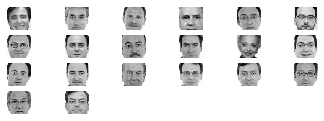

In [30]:
#We obtain a figure with the 31 member faces that belongs to cluster 0.
pl.figure(figsize=(6,3))

for i in range(1,21):
    pl.subplot(6,6,i)
    pl.imshow(c0[i])
    pl.axis('off')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

pl.show()

We see how the totallity of the representatives of this cluster are men, except one.

In [31]:
#We filter the original matrix with the vector of observations that belongs to cluster 1.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c1=X[cluster_1].reshape((len(cluster_1),Is[0],Is[1]))
c1.shape

(35, 86, 85)

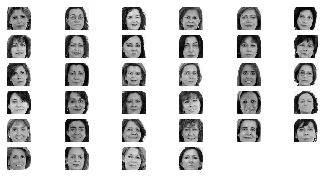

In [39]:
#We obtain a figure with the 35 member faces that belongs to cluster 2.
pl.figure(figsize=(6,3))

for i in range(1,35):
    pl.subplot(6,6,i)
    pl.imshow(c1[i])
    pl.axis('off')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

pl.show()

In this other cluster, all the representatives are woman with long hair.

## 4. Plot the centroid corresponding to each k-means cluster (10 images corresponding to the mean of each cluster). Function of clustering

In [71]:
def clustering(dataset, number_of_clusters): # function to show the mean images
    k_means = cluster.KMeans(n_clusters = number_of_clusters)
    k_means.fit(dataset)
    for i in range(0,number_of_clusters):
        pl.figure()
        pl.subplot(2, 5, number_of_clusters)
        pl.imshow( k_means.cluster_centers_[i,:].reshape(86,85))
        pl.axis("off")
    return

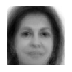

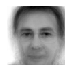

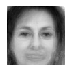

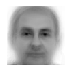

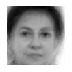

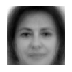

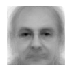

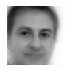

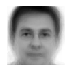

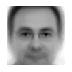

In [72]:
clustering(X, 10)

Overall it is easy to identify which characteristic each centroid is trying to cluster, it can be by genre, having long/short hair, wearing glasses, having  moustache...

# PCA

## 5. Fit a PCA model of the dataset

In [38]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

sX = preprocessing.scale(X) # Scaled data matrix (standardized and centred)


In [39]:
mod = PCA( n_components = 5 )
mod.fit(sX)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
sum(mod.explained_variance_ratio_[:2]) # Variance explained by a two pca


0.3010920840733312

After fitting a PCA model with 5 components, we can check that the first two account for the 30% pf the total variance, a small value, meaning that the approximations in 2 dimensions could be non-realistic.

## 6. Build a 2D score plot with the projections of the representatives onto the PCA plane

In [46]:
T = mod.transform(sX) # Projected data matrix

In [47]:
T.shape

(348, 5)

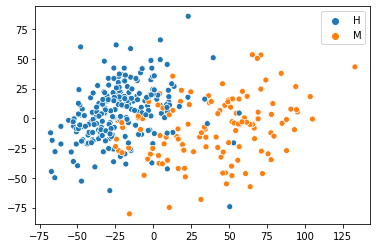

In [48]:
pl.figure()
import seaborn as sns
sns.scatterplot(T[:,0], T[:,1], hue = Yg)

By plotting each representative in the 2 dimensional plane with the first 2 PC, we can get a grasp of the differences in the faces by genre.

Eigen
===

## 7. Plot the first three eigenvectors (principal components, PCs) projection vectors

In [49]:
mod.components_.shape

(5, 7310)

In [50]:
mod.components_.reshape( (5, Is[0], Is[1]) ).shape # Five times an image

(5, 86, 85)

In [51]:
e = mod.components_.reshape( (5, Is[0], Is[1]) )

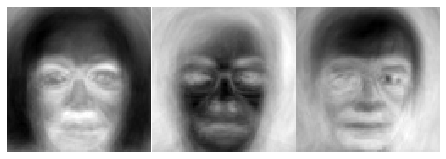

In [52]:
pl.figure()
pl.subplot(131) # 1 row, 3 numb of images, 1 column
pl.imshow(e[0])
pl.axis("off")

pl.subplot(132)
pl.imshow(e[1])
pl.axis("off")

pl.subplot(133)
pl.imshow(e[2])
pl.axis("off")

pl.subplots_adjust(wspace = 0.01, hspace = 0.01, top = 1, left = 0, right = 1)
pl.show()

The images above are the three first PC, we can see that are orthogonal to each other and they try to account for as much variation as possible.

## 8. Plot the amount of variance explained by each PCs


In [53]:
mod.explained_variance_ratio_

array([0.2136283 , 0.08746378, 0.07299065, 0.0517424 , 0.04674383])

## 9. Train a gender predictor with the class of representatives. Which performance can you get on predicting gender form images? Provide metrics.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Yg, test_size = 0.5, random_state = 42)

After importing the necessary tools we will proceed to train two predictors. We have chosen to fit a KNN algorithm and a SVM, we will compare the results to see how they fit the data.

We will split the data in half, using a 50% for training and the other 50% for evaluating the predictor.

### KNN method

In [59]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(7)

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [61]:
y_pred = knn.predict(X_test)

### Evaluation

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) # Confusion matrix metric
print(classification_report(y_test, y_pred)) # Classification report metric

[[108   4]
 [ 14  48]]
              precision    recall  f1-score   support

           H       0.89      0.96      0.92       112
           M       0.92      0.77      0.84        62

    accuracy                           0.90       174
   macro avg       0.90      0.87      0.88       174
weighted avg       0.90      0.90      0.89       174



Overall the KNN methodology performs very decent. For the evaluation we have chosen the metrics of the confusion matrix and classification report. The confusion matrix, as its name reveals, is a matrix where the diagonal are the number of well labeled objects, and off the diagonal the bad ones. In this case the first row is about men and the second row about women. It performs better on men, where it has only gotten wrong 4 guys. This is because the amount of men is much higher than women and hence has more training capacity.

On the other hand, the classification report shows again good results on predicting both genders with more than 80% accuracy.

### SVM method

In [73]:
from sklearn import svm
mod = svm.SVC()
mod.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_pred = mod.predict(X_test)

### Evaluation

In [75]:
print(confusion_matrix(y_test, y_pred)) # Confusion matrix metric
print(classification_report(y_test, y_pred)) # Classification report metric

[[104   8]
 [  9  53]]
              precision    recall  f1-score   support

           H       0.92      0.93      0.92       112
           M       0.87      0.85      0.86        62

    accuracy                           0.90       174
   macro avg       0.89      0.89      0.89       174
weighted avg       0.90      0.90      0.90       174



Again, the results are good, similar to the ones obtained with KNN, SVM only seems to perform better in order to identify women.

## 10. Do the same with the label containing political party of the representatives. Discuss the results.

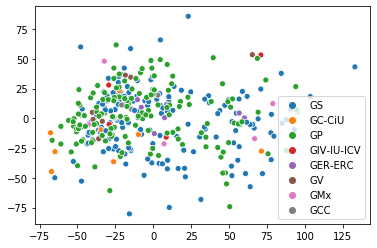

In [76]:
pl.figure()
sns.scatterplot(T[:,0], T[:,1], hue = Yp)

### KNN method

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Yp, test_size = 0.75)

We can try different percentages of the test_size, we will see below that it does not matter as the model makes no sense. But we try to fit it nonetheless.

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [88]:
y_pred = knn.predict(X_test)

In [89]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0  0  0  4  5  0]
 [ 0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  3  2  0]
 [ 0  0  0  0  0 28 84  0]
 [ 0  0  0  0  0 22 94  0]
 [ 0  0  0  0  0  3  4  0]]
              precision    recall  f1-score   support

      GC-CiU       0.00      0.00      0.00         9
         GCC       0.00      0.00      0.00         2
     GER-ERC       0.00      0.00      0.00         7
  GIV-IU-ICV       0.00      0.00      0.00         3
         GMx       0.00      0.00      0.00         5
          GP       0.47      0.25      0.33       112
          GS       0.47      0.81      0.59       116
          GV       0.00      0.00      0.00         7

    accuracy                           0.47       261
   macro avg       0.12      0.13      0.11       261
weighted avg       0.41      0.47      0.40       261



C:\Users\berna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying to predict the political affiliation by checking the face of a person is not a good idea, as there is no relation between a face of a person and its political affiliation.

Even more, because the amount of representatives of each party differes a lot, Grupo Popular(GP) and Grupo Socialista(GS) have more than a half of the people while there is minority parties like GCC or GMX, their weight in the classificator is much smaller. The train does not have enough data on those parties and the prediction are poor.

# Bonus questions

# 1. Use the model you have built in 9 to predict the gender of your fellow class (dataset provided below). Discuss the results.

In [1]:
from PIL import Image
import os
from matplotlib import image
from matplotlib import pyplot

In [2]:
d = "classdb"
path={}
for i in range(0,len(os.listdir(d))):
    path[i]=os.path.join(d,os.listdir(d)[i])

In [5]:
full_path={}
for i in list(range(0, 4)) + list(range(5, 32)):
    full_path[i]=os.path.join(path[i],''.join(os.listdir(path[i])))

type(full_path[1])    

str

In [7]:
image_list=[] #This is our new dataset
for i in list(range(0, 4)) + list(range(5, 21))+ list(range(23, 32)): #We drop Gaëlle's photo
    from matplotlib import image
    image=image.imread(full_path[i])
    image_list.append(image)

In [16]:
image_list.len()

AttributeError: 'list' object has no attribute 'len'

In [15]:
I = pl.imread(image_list[1].getPicfile())
pl.imshow(I)
np.shape(I)

AttributeError: 'numpy.ndarray' object has no attribute 'getPicfile'